In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [54]:
for dirname , _ , filenames in os.walk('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data'):
    for filename in filenames:
        print(os.path.join(dirname , filename))

/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202109-divvy-tripdata.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202104-divvy-tripdata.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/.DS_Store
/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202107-divvy-tripdata.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202111-divvy-tripdata.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202112-divvy-tripdata.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202203-divvy-tripdata.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202202-divvy-tripdata.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202201-divvy-tripdata.csv
/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202110-divvy-tripdata.csv
/Users/abhinav/D

In [55]:
apr21 = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202104-divvy-tripdata.csv')
may21 = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202105-divvy-tripdata.csv')
#jun21 = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202106-divvy-tripdata.csv')
#jul21 = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202107-divvy-tripdata.csv')
#aug21 = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202108-divvy-tripdata.csv')
#sep21 = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202109-divvy-tripdata.csv')
#oct21 = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202110-divvy-tripdata.csv')
#nov21 = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202111-divvy-tripdata.csv')
#dec21 = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202112-divvy-tripdata.csv')
#jan22 = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202201-divvy-tripdata.csv')
#feb22 = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202202-divvy-tripdata.csv')
#mar22 = pd.read_csv('/Users/abhinav/Downloads/essentials/projects/Python/Google/cyclistic data/202203-divvy-tripdata.csv')

In [56]:
df = pd.concat([apr21, may21])  #,jun21 , jul21 , aug21 , sep21 , oct21 , nov21 , dec21 , jan22 , feb22 , mar22])
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 868863 entries, 0 to 531632
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             868863 non-null  object 
 1   rideable_type       868863 non-null  object 
 2   started_at          868863 non-null  object 
 3   ended_at            868863 non-null  object 
 4   start_station_name  789063 non-null  object 
 5   start_station_id    789063 non-null  object 
 6   end_station_name    782495 non-null  object 
 7   end_station_id      782495 non-null  object 
 8   start_lat           868863 non-null  float64
 9   start_lng           868863 non-null  float64
 10  end_lat             868144 non-null  float64
 11  end_lng             868144 non-null  float64
 12  member_casual       868863 non-null  object 
dtypes: float64(4), object(9)
memory usage: 92.8+ MB


In [57]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

df = df[df['started_at'] <= df['ended_at']].copy()
df['ride_length_min'] = ((df['ended_at'] - df['started_at']).dt.total_seconds() / 60).astype(int)

df = df[df['ride_length_min'] > 0]
df = df.drop_duplicates(subset='ride_id')

df = df.dropna(subset=['ride_id', 'started_at', 'ended_at', 'rideable_type', 'member_casual'])

In [58]:
df['day'] = df['started_at'].dt.day_name()
df['hour'] = df['started_at'].dt.hour
df['month'] = df['started_at'].dt.month
df['day_of_week'] = df['started_at'].dt.dayofweek

In [59]:
print(df.info())
print(df['member_casual'].value_counts())
print(df['rideable_type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 855665 entries, 0 to 531632
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             855665 non-null  object        
 1   rideable_type       855665 non-null  object        
 2   started_at          855665 non-null  datetime64[ns]
 3   ended_at            855665 non-null  datetime64[ns]
 4   start_station_name  778944 non-null  object        
 5   start_station_id    778944 non-null  object        
 6   end_station_name    772832 non-null  object        
 7   end_station_id      772832 non-null  object        
 8   start_lat           855665 non-null  float64       
 9   start_lng           855665 non-null  float64       
 10  end_lat             854951 non-null  float64       
 11  end_lng             854951 non-null  float64       
 12  member_casual       855665 non-null  object        
 13  ride_length_min     855665 non-nul

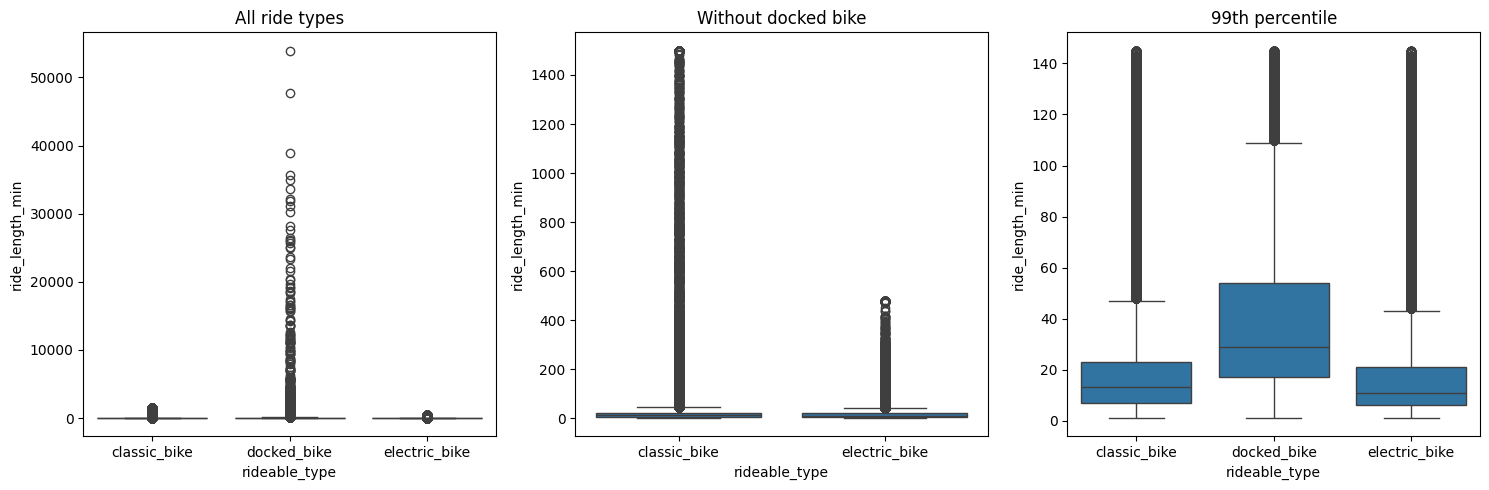

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, x='rideable_type', y='ride_length_min', ax=axes[0])
axes[0].set_title('All ride types')
sns.boxplot(data=df[df['rideable_type'] != 'docked_bike'], x='rideable_type', y='ride_length_min', ax=axes[1])
axes[1].set_title('Without docked bike')
perc99 = df['ride_length_min'].quantile(0.99)
sns.boxplot(data=df[df['ride_length_min'] <= perc99], x='rideable_type', y='ride_length_min', ax=axes[2])
axes[2].set_title('99th percentile')
plt.tight_layout()
plt.show()

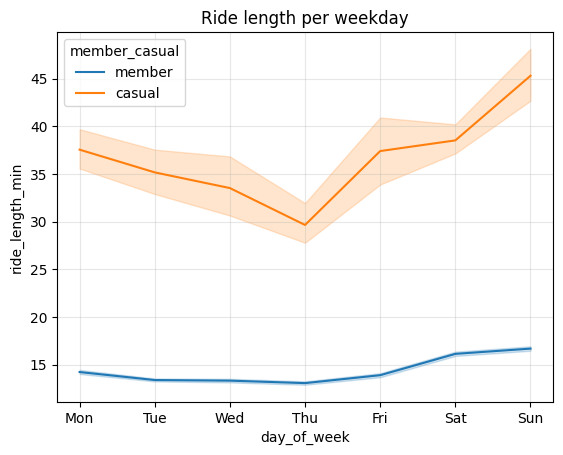

In [61]:
day_name = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_name'] = df['started_at'].dt.day_name().str[:3]
sns.lineplot(data=df, x='day_of_week', y='ride_length_min', hue='member_casual')
plt.xticks(ticks=range(7), labels=day_name)
plt.title('Ride length per weekday')
plt.grid(alpha=0.3)
plt.show()

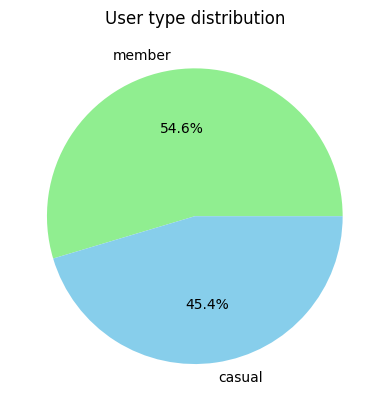

In [62]:
user_counts = df['member_casual'].value_counts()
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'skyblue'])
plt.title('User type distribution')
plt.show()

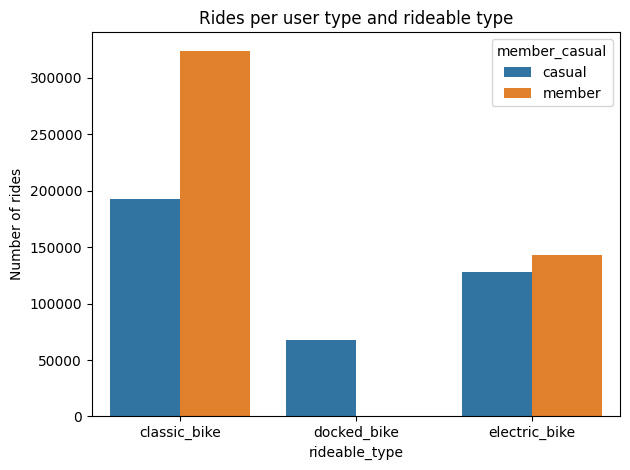

In [63]:
ride_user_grp = df.groupby(['member_casual', 'rideable_type'])['ride_id'].count().reset_index(name='count')
sns.barplot(data=ride_user_grp, x='rideable_type', y='count', hue='member_casual')
plt.ylabel('Number of rides')
plt.title('Rides per user type and rideable type')
plt.tight_layout()
plt.show()

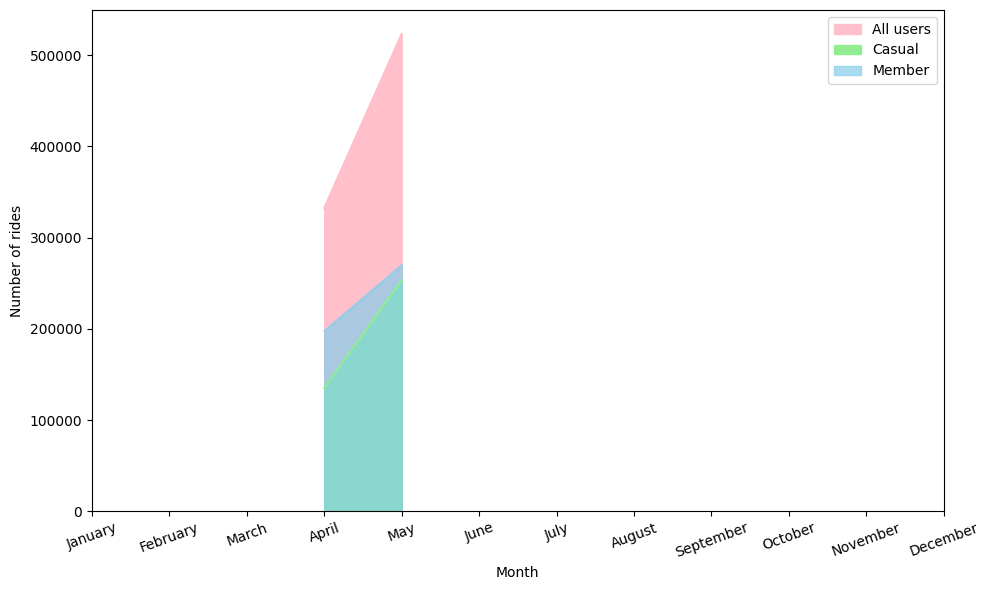

In [64]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month_name'] = df['started_at'].dt.month_name()
monthly_counts = df['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='area', color='pink', alpha=1, label='All users')
df[df['member_casual'] == 'casual']['month'].value_counts().sort_index().plot(kind='area', color='lightgreen', alpha=1, label='Casual')
df[df['member_casual'] == 'member']['month'].value_counts().sort_index().plot(kind='area', color='skyblue', alpha=0.7, label='Member')
plt.xticks(ticks=range(1, 13), labels=months, rotation=20)
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.legend()
plt.tight_layout()
plt.show()

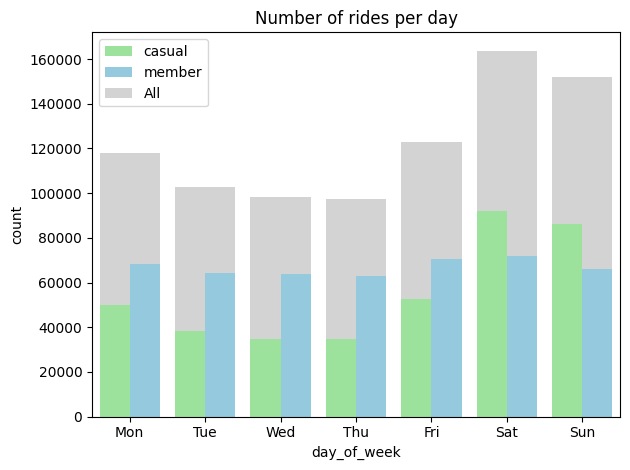

In [65]:
ride_per_day = df['day_of_week'].value_counts().sort_index()
user_day = df.groupby(['member_casual', 'day_of_week'])['ride_id'].count().reset_index(name='count')
plt.bar(ride_per_day.index, ride_per_day.values, color='lightgray', label='All')
sns.barplot(data=user_day, x='day_of_week', y='count', hue='member_casual', palette=['lightgreen', 'skyblue'])
plt.xticks(ticks=range(7), labels=day_name)
plt.title('Number of rides per day')
plt.legend()
plt.tight_layout()
plt.show()

In [66]:
df_sample = df.sample(n=5000, random_state=42)
fig1 = px.scatter_mapbox(df_sample, lat='start_lat', lon='start_lng', color='member_casual',
                         zoom=9, color_discrete_sequence=['lightgreen', 'skyblue'], title='User clustering')
fig1.update_layout(mapbox_style='carto-positron')
fig1.show()

df20 = df.dropna().sample(n=1000, random_state=42).sort_values(by=['member_casual', 'started_at']).reset_index(drop=True)
fig2 = px.scatter_mapbox(df20, lat="start_lat", lon="start_lng", hover_name=df20.index, zoom=9, title='User paths')
fig2.update_layout(mapbox_style="carto-positron")
fig2.add_traces(px.line_mapbox(df20, lat="start_lat", lon="start_lng", color='member_casual',
                               color_discrete_sequence=['lightgreen', 'skyblue']).data)
fig2.show()

/var/folders/q2/mtjqjllx1gd3d313l6v2m63c0000gn/T/ipykernel_25894/2228659077.py:2: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



/var/folders/q2/mtjqjllx1gd3d313l6v2m63c0000gn/T/ipykernel_25894/2228659077.py:8: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

/var/folders/q2/mtjqjllx1gd3d313l6v2m63c0000gn/T/ipykernel_25894/2228659077.py:10: DeprecationWarning:

*line_mapbox* is deprecated! Use *line_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

